In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import shap

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()

features = breast_cancer_dataset['feature_names']
data = pd.DataFrame(breast_cancer_dataset['data'], columns=features)
data['target'] = breast_cancer_dataset['target']

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
train, test = train_test_split(data, test_size=.3)

In [4]:
clf = CatBoostClassifier(max_depth=2, verbose=False)
clf.fit(train[features], train['target'])

print("Training results  -----------------")
print(classification_report(train['target'], clf.predict(train[features])))
print("\nTesting results  -----------------")
print(classification_report(test['target'], clf.predict(test[features])))

Training results  -----------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       144
           1       1.00      1.00      1.00       254

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398


Testing results  -----------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        68
           1       0.94      0.98      0.96       103

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



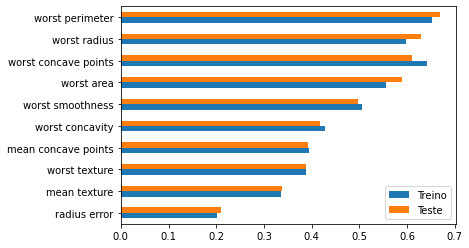

In [5]:
exp = shap.Explainer(clf)
shap_values_train = exp(train[features])
shap_values_test = exp(test[features])

shap_df_train = pd.DataFrame(shap_values_train.values, columns=features)
shap_df_test = pd.DataFrame(shap_values_test.values, columns=features)

full_shap = pd.concat((shap_df_train.abs().mean(), 
                       shap_df_test.abs().mean()), axis=1)
full_shap.columns=['Treino', 'Teste']
full_shap.sort_values('Teste').tail(10).plot.barh();

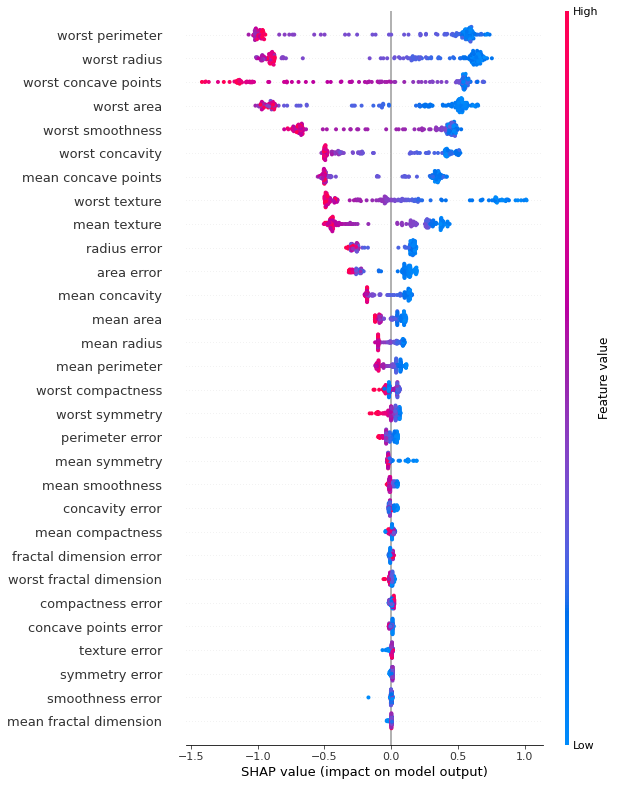

In [6]:
shap.plots.beeswarm(shap_values_test, max_display=30)

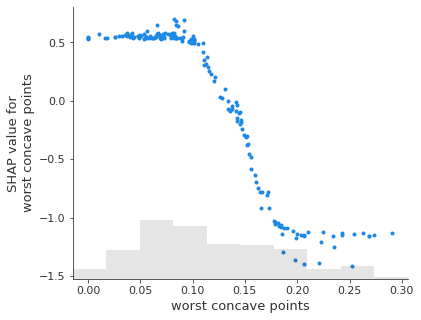

In [7]:
shap.plots.scatter(shap_values_test[:,"worst concave points"])

Text(0.5, 0, 'Sum of shap values')

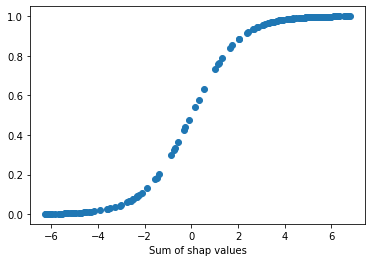

In [16]:
prob_death = clf.predict_proba(test[features])[:,1]
sum_shap = shap_df_test.sum(axis=1) + exp.expected_value
plt.scatter(sum_shap, prob_death)
plt.xlabel("Sum of shap values")
plt.xlabel("Sum of shap values")